### Getting started
Run the first cell (press the play button just below here if it is collapsed/hidden) to set everything up, then scroll to "Fit your own file" or "Simulated data"

In [ ]:
# mamba create -n general-fitting scipy numpy lmfit pymcr scikit-learn matplotlib ipykernel openpyxl pandas

import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pss_resolver.fit import mcr_factors,get_acceptable_solutions
from pss_resolver.utils import pymcr_handler_for_file,proc_data,export_dcs_to_csv,export_to_csv
from pss_resolver.simulate import gen_pss_specs,simulate_and_plot

# some figure defaults
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
plt.rcParams['svg.fonttype'] = 'none'


### Fit your own data

Put an XLSX file into the your_data subfolder of this script.

The XLSX file should have the following format:
1. First row should be a header row with some string text describing the data in each column (e.g. irradiation wavelength for PSS)
2. First column should be a list of wavelengths or your preferred x-axis
3. Second column must be the "pure" spectrum of the known stable isomer.
4. Each consecutive column should be the absorption at a single photostationary state

Ensure that all of your spectra were collected at the same concentration, and that there is an isobestic point.

To fit: run the next cell and read the outputs.

In [ ]:
xlfiles = glob.glob('your_data/*.xlsx')
for f in xlfiles:
    print(f"Processing file: {f}")
    _ = pymcr_handler_for_file(f)
   # _ = pymcr_handler_for_file(f,threshold=1.001,n_solutions_to_save=15)


if len(xlfiles) == 0:
    print("No data files found in your_data folder. Please add an XLSX file and rerun.")

### Fix example data

This block will simulate and fit all of the example data files in the example_data folder. It does not save the resulting CSV files by default, but you can change that in the code if you want to.

In [ ]:
xlfiles = glob.glob('example_data/*.xlsx')
for f in xlfiles:
    print(f"Processing file: {f}")
    _ = pymcr_handler_for_file(f,save_csvs=False)



### Simulating data

The next two cells (1) simualte some PSS spectra; and (2) extract the "pure" spectra from these simulated data.

Change the wavelength range (lower_wavelength; upper_wavelength) and number of spectra (nspec) in the first cell to adjust the simulation. If you simulate more PSS, you usually get better basis spectra.

In [ ]:
lower_wavelength = 200
upper_wavelength = 800
nspec=4

xx = np.linspace(lower_wavelength,upper_wavelength,upper_wavelength-lower_wavelength+1)
labels = [f'pss {n}' for n in np.arange(nspec)]

D,C,ST = gen_pss_specs(xx,nspec)
plt.figure(figsize=(3.34,2.4))
plt.plot(xx,D.T)
#plt.title('Simulated spectra')
plt.ylabel('Absorbance')
plt.xlabel('Wavelength [nm]')
plt.xlim(200,800)
plt.legend(['PSS1','PSS2','PSS3','PSS4'])
plt.show()

In [ ]:
Ccalc,STcalc,Dcalc=proc_data(xx,D,labels,threshold=1.001)

In [ ]:
# Compare extracted basis spectra to true basis specta

plt.figure()
plt.plot(xx,ST.T[:,0],'c',label='True basis spectrum 1')
plt.plot(xx,ST.T[:,1],'k',label='True basis spectrum 2')

plt.plot(xx,STcalc[0].T[:,0],'m--',label='Extracted stable')
for ii,spec in enumerate(STcalc):
  if ii == 0:
    plt.plot(xx,spec.T[:,1],'r',label='Unknown (extracted)',alpha=0.3)
  else:
    plt.plot(xx,spec.T[:,1],'r',alpha=0.3)
plt.xlabel('Wavelength [nm]')
plt.legend()
plt.show()

### Paper figures

In [ ]:
# some figure defaults
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["font.size"] = 7
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
plt.rcParams['svg.fonttype'] = 'none'


In [ ]:
lower_wavelength = 200
upper_wavelength = 800
nspec=4

xx = np.linspace(lower_wavelength,upper_wavelength,upper_wavelength-lower_wavelength+1)
labels = [f'pss {n}' for n in np.arange(nspec)]

D,C,ST = gen_pss_specs(xx,nspec)
plt.figure(figsize=(3.34,2.4))
plt.plot(xx,D.T)
#plt.title('Simulated spectra')
plt.ylabel('Absorbance')
plt.xlabel('Wavelength [nm]')
plt.xlim(200,800)
plt.ylim(bottom=0)
plt.legend(['PSS1','PSS2','PSS3','PSS4'])
plt.show()

In [ ]:
# because this block relies on randomly-generated data, the figures will always be 
# different and will not be the same as those in the paper when you re-run the cell.
# 
Ccalc,STcalc,Dcalc=proc_data(xx,D,labels,threshold=1.001)
f,axs=plt.subplots(nrows=1,ncols=2,figsize=(3.37,1.6))
plt.subplot(121)
plt.plot(xx,ST.T[:,0],'C1',alpha=0.5)
plt.plot(xx,ST.T[:,1],'C0',alpha=0.5)
plt.plot(xx,D.T,'0.5',linestyle='--')
plt.ylabel('Absorbance')
plt.xlabel('Wavelength [nm]')
plt.xlim(200,800)
plt.ylim(bottom=0)
plt.legend(['$A_a$','$A_b$','PSS'],fontsize=7,handlelength=1,handletextpad=0.4,labelspacing=0.1,frameon=False)
plt.ylim(bottom=0)



plt.subplot(122)

plt.plot(xx,ST.T[:,0],'C1',label='$A_a$ (true)')

for ii,spec in enumerate(STcalc):
  if ii == 0:
    plt.plot(xx,spec.T[:,1],'r',label='$A_b$ (fit)',alpha=0.1)
  else:
    plt.plot(xx,spec.T[:,1],'r',alpha=0.1)


plt.plot(xx,ST.T[:,1],'C0',label='$A_b$ (true)')
#plt.ylabel('Absorbance')
plt.xlim(200,800)
plt.ylim(bottom=0)

plt.xlabel('Wavelength [nm]')
leg=plt.legend(fontsize=7,handlelength=1,handletextpad=0.4,labelspacing=0.1,frameon=False)
for line in leg.legend_handles:
    line.set_alpha(1)

for i, ax in enumerate(axs):
    label = f'({chr(97 + i)})' # 'a', 'b', 'c', ...
    
plt.gca().tick_params(axis='y', left=False, labelleft=False)
plt.tight_layout()
plt.savefig('paper-figures/ms/pss_sim_mcr_results.png',dpi=600)
plt.savefig('paper-figures/ms/pss_sim_mcr_results.pdf')
plt.show()




Processing file: example_data/AAP_Conc_40uM.xlsx
Processing file: example_data/ABT_Conc_20uM.xlsx
Processing file: example_data/ABF4_Conc_40uM.xlsx
Processing file: example_data/Indigo_40uM.xlsx


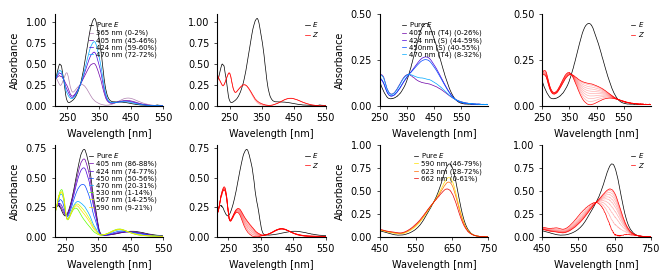

In [3]:
ms_data = ['example_data/AAP_Conc_40uM.xlsx',  'example_data/ABT_Conc_20uM.xlsx',  'example_data/ABF4_Conc_40uM.xlsx', 'example_data/Indigo_40uM.xlsx']

#nrows = len(ms_data)
f,axs=plt.subplots(nrows=2,ncols=4,figsize=(6.5,1.3*2))

# colours calculated using code in https://stackoverflow.com/questions/44959955/matplotlib-color-under-curve-based-on-spectral-color
wl_to_rgb = {
     365: (0.3816778909618176, 0.0, 0.3816778909618176, 0.5),
 405: (0.4269677937040647, 0.0, 0.657145717670701, 1.0),
 424: (0.29443527731313485, 0.0, 0.8476466642900155, 1.0),
 450: (0.0, 0.27594593229224296, 1.0, 1.0),
 470: (0.0, 0.664539805948974, 1.0, 1.0),
 530: (0.36706718774955405, 1.0, 0.0, 1.0),
 567: (0.8484406197510931, 1.0, 0.0, 1.0),
 590: (1.0, 0.874902114757804, 0.0, 1.0),
 623: (1.0, 0.4203465229510498, 0.0, 1.0),
 662: (0.9082560627535816, 0.0, 0.0, 1.0),
}

# all_data = {}
# irrad_wls = set()
# # sort out colours for plotting
# for i,f in enumerate(ms_data):
#     data = pd.read_excel(f,index_col=0)
#     all_data[f] = data
#     for col in data.columns:
#         m=re.match(r'(\d+\.?\d+?) ?nm',col)
#         if m:
#             irrad_wls.add(m.group(1))

# irrad_wls = sorted(list(irrad_wls),key=lambda x: float(x))
# print(irrad_wls)

for i,f in enumerate(ms_data):
    data = pd.read_excel(f,index_col=0)
    print(f"Processing file: {f}")
    data = pd.read_excel(f,index_col=0)
    X = data.values[:,:].T
    c,spec,X_calc = mcr_factors(X, n_components=2, known_id=0, init_guess="nmf",method='mvol')
    res_ST,res_C = get_acceptable_solutions(X, spec, c, n=201, lb=-1, ub=1,threshold=1.001)

    min_C = np.min(np.array(res_C),axis=0)
    max_C = np.max(np.array(res_C),axis=0)

    labels = [f"{d} ({100*min_C[i][0]:.0f}-{100*max_C[i][0]:.0f}%)" for i,d in enumerate(data.columns)]

    plt.sca(axs[int(i/2),2*(i%2)])

    # sort the labels and data to put Pure E first, and wavelengths ascending
    sort_key = []
    for ij,l in enumerate(labels):
        if 'nm' in l:
            wl = int(re.match(r'(\d+\.?\d+?) ?nm',l.split('\n')[0]).group(1))
            sort_key.append((wl,ij))
        else:
            sort_key.append((0,ij))
    sort_key = sorted(sort_key,key=lambda x: x[0])

    for ii in sort_key:
        ij = ii[1]
        l= labels[ij]
        if 'nm' in l:
            wl = int(re.match(r'(\d+\.?\d+?) ?nm',l.split('\n')[0]).group(1))
            color = wl_to_rgb[wl]
            plt.plot(data.index,X.T[:,ij],color=color,label=l)
        else:
            plt.plot(data.index,X.T[:,ij],label='Pure $E$',color='k')
    # plt.plot(data.index,X.T,label=labels)
    plt.xlim(min(data.index),max(data.index))
    
    # set up better axis ticks 
    if np.max(X) > 0.75:
        plt.yticks([0.0,0.25,0.5,0.75,1.0])
    elif np.max(X) > 0.55:
        plt.yticks([0.0,0.25,0.5,0.75])
    else:
        plt.yticks([0.0,0.25,0.5])

    if min(data.index) >400:
        plt.xticks([450,550,650,750])
    else:
        plt.xticks([250,350,450,550])

    plt.legend(handlelength=.6,handletextpad=0.4,labelspacing=0.1,frameon=False,fontsize=5)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Absorbance')
    plt.ylim(bottom=0)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().tick_params(axis='both', which='major', length=2, width=.5)

    plt.sca(axs[int(i/2),2*(i%2)+1])
    plt.plot(data.index,spec[0,:].T,'k',label='$E$')

    # we will just plot a max of 10 solution spectra for clarity
    ix_to_plot = np.linspace(0,len(res_ST)-1,min(10,len(res_ST)),dtype=int)
    res_ST_to_plot = [res_ST[i] for i in ix_to_plot]

    for ii,spec in enumerate(res_ST_to_plot):
        if ii == 0:
            plt.plot(data.index,spec[1,:].T,'r',label=['$Z$'],alpha=1)
        elif ii == 9:
            plt.plot(data.index,spec[1,:].T,'r',alpha=1)
        else:
            plt.plot(data.index,spec[1,:].T,'r',alpha=0.3)
    leg=plt.legend(handlelength=.6,handletextpad=0.4,labelspacing=0.1,frameon=False,fontsize=5)
    for line in leg.legend_handles:
        line.set_alpha(1)
    plt.xlabel('Wavelength [nm]')
    plt.xlim(min(data.index),max(data.index))
    # set up better axis ticks 
    if np.max(X) > 0.75:
        plt.yticks([0.0,0.25,0.5,0.75,1.0])
    elif np.max(X) > 0.55:
        plt.yticks([0.0,0.25,0.5,0.75])
    else:
        plt.yticks([0.0,0.25,0.5])

    if min(data.index) >400:
        plt.xticks([450,550,650,750])
    else:
        plt.xticks([250,350,450,550])

    #plt.gca().tick_params(axis='y', left=True, labelleft=False)
    plt.gca().tick_params(axis='both', which='major', length=2, width=.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.ylim(bottom=0)

    export_dcs_to_csv(f.split('/')[-1].split('.')[0], data.index.values, X, res_C,  res_ST)

plt.tight_layout(pad=0,h_pad=0.2,w_pad=0.02)
plt.savefig('paper-figures/ms/pss_mcr_real_results.png',dpi=600)
plt.savefig('paper-figures/ms/pss_mcr_real_results.pdf',dpi=600)

In [ ]:
# SI Figures

si_data = glob.glob('example_data/*.xlsx')
nrows = len(si_data)
#f,axs=plt.subplots(nrows=nrows,ncols=2,figsize=(2*3.34,1.8*1.6*nrows))

for i,f in enumerate(si_data):
    print(f"Processing file: {f}")
    data = pd.read_excel(f,index_col=0)
    X = data.values[:,:].T
    c,spec,X_calc = mcr_factors(X, n_components=2, known_id=0, init_guess="nmf",method='mvol')
    res_ST,res_C = get_acceptable_solutions(X, spec, c, n=201, lb=-1, ub=1,threshold=1.001)

    min_C = np.min(np.array(res_C),axis=0)
    max_C = np.max(np.array(res_C),axis=0)

    labels = [f"{d}\n({100*min_C[i][0]:.0f}-{100*max_C[i][0]:.0f}%)" for i,d in enumerate(data.columns)]

    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(2*3.34,1.8*1.6*1))
    plt.sca(axs[0])
    plt.plot(data.index,X.T,label=labels)
    plt.xlim(min(data.index),max(data.index))
    plt.legend(handlelength=1,handletextpad=0.4,labelspacing=0.1,frameon=False,ncol=2,columnspacing=0.2,fontsize=6)
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Absorbance')
    plt.ylim(bottom=0)
    plt.title(f)
    plt.sca(axs[1])
    plt.plot(data.index,spec[0,:].T,label='$E$')
    for ii,spec in enumerate(res_ST):
        if ii == 0:
            plt.plot(data.index,spec[1,:].T,'r',label=['$Z$'],alpha=0.3)
        else:
            plt.plot(data.index,spec[1,:].T,'r',alpha=0.3)
    leg=plt.legend(handlelength=1,handletextpad=0.4,labelspacing=0.1,frameon=False)
    for line in leg.legend_handles:
        line.set_alpha(1)
    plt.xlabel('Wavelength [nm]')
    plt.xlim(min(data.index),max(data.index))
    plt.gca().tick_params(axis='y', left=False, labelleft=False)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig(f"paper-figures/si/{f[len('example_data/'):-5]}_mcr_results.png",dpi=600)
    plt.savefig(f"paper-figures/si/{f[len('example_data/'):-5]}_mcr_results.pdf",dpi=600)
    plt.show()


# plt.savefig('pss_mcr_real_results.png',dpi=600)
# plt.savefig('pss_mcr_real_results.pdf',dpi=600)

In [ ]:
# because this block relies on randomly-generated data, the figures will always be 
# different and will not be the same as those in the paper when you re-run the cell.

# plot the plane defined by C and then the transformed C_calc
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(6,6))
plt.rcParams["font.size"] = 9 # SI fig bigger


method='mvol'
for i in range(4):
    s,C,ST = gen_pss_specs(npss=8, fA=1)
    C_calc,ST_calc,X_calc = mcr_factors(s, n_components=2, known_id=0, svd_reduce=False,  method=method)
    plt.sca(ax[i//2,i%2])
    plt.plot(C[:,0], C[:,1], 'o', markersize=3, label='True C')
    plt.plot(C_calc[:,0], C_calc[:,1], 'x', markersize=3, label=f'{method} C')

    plt.xlabel('$x_A$')
    plt.ylabel('$x_B$')
    plt.legend()
    # calc transformation matrix
    T = np.linalg.lstsq(C_calc, C,rcond=None)[0]
    # print T on graph
    print(T)

    if abs(T[0,1]) < 1e-5:
        T[0,1] = 0.0  # for plotting clarity
    
    plt.annotate(""#r"$T = \arg\min_T \| C_{\mathrm{calc}}\, T - C \|_2$\n"
+f'$T = $\n[{T[0,0]:.2f} {T[0,1]:.2f}]\n[{T[1,0]:.2f} {T[1,1]:.2f}]',
                 xy=(0.05, .2), xycoords='axes fraction',
                 fontsize=9, ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5))

plt.tight_layout()
plt.savefig('paper-figures/si/pss_mcr_C_transform.png',dpi=600)
plt.savefig('paper-figures/si/pss_mcr_C_transform.pdf')
plt.show()


In [ ]:
from pss_resolver.fit import calc_reconstruction_error, rotation_simple

plt.rcParams["font.size"] = 9 # SI fig bigger
# simulate some data
s,C,ST = gen_pss_specs(npss=4, fA=1)
C_calc,ST_calc,X_calc = mcr_factors(s, n_components=2, known_id=0, svd_reduce=False,  method='mvol')

orig_err = calc_reconstruction_error(s,C_calc,ST_calc)
print(f"Original reconstruction error: {orig_err:.2e}")

lb =-1
ub = 1
n=401

res = []
# for xx in np.linspace(lb,ub,n):
#     for y in np.linspace(lb,ub,n):
#         C_rot,ST_rot = rotation(ST_calc, C_calc, xx, y)
#         err = calc_reconstruction_error(s,C_rot,ST_rot)
#         #if np.linalg.norm(ST_rot[0,:] - ST[0,:]) > 0.1:
#         err+= np.linalg.norm(ST_rot[0,:] - ST[0,:]) # add a large error penalty if the first spectrum deviates too much from the known
#         res.append([xx,y,err,C_rot,ST_rot])

for xx in np.linspace(lb,ub,n):

    C_rot,ST_rot = rotation_simple(ST_calc, C_calc, xx)
    recon_err = calc_reconstruction_error(s,C_rot,ST_rot)
    rel_err = (recon_err/orig_err)
    #if np.linalg.norm(ST_rot[0,:] - ST[0,:]) > 0.1:
    known_err = np.linalg.norm(ST_rot[0,:] - ST_calc[0,:]) / np.linalg.norm(ST_calc[0,:])
    err = rel_err  + known_err # add a large error penalty if the first spectrum deviates too much from the known
    res.append([xx,err,C_rot,ST_rot])


errs = np.array([r[1] for r in res])
print(f"Min err: {min(errs)}\nMax err: {max(errs)}")
fig,axs = plt.subplots(ncols=2,nrows=1,figsize=(6,3))
plt.sca(axs[0])
plt.plot(np.linspace(lb,ub,n), np.log10(errs))
# errs = errs.reshape((n,n))
# plt.imshow(np.log10(errs), extent=(lb,ub,lb,ub), origin='lower')

plt.xlabel('$x$ variable in transformation matrix')
plt.ylabel('log(E)')

plt.sca(axs[1])
plt.hist(np.log10(errs).flatten(), bins=50)
plt.xlabel('log(E)')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('paper-figures/si/pss_mcr_transform_err_as_fofx.png',dpi=600)
plt.savefig('paper-figures/si/pss_mcr_transform_err_as_fofx.pdf')

